# Part I - Ford GoBike System Data Analysis
## by Sandra Kamikazi


## Introduction

#### Dataset Description

The larger San Francisco Bay area's bike-sharing program's data collection includes information on each ride.
The Ford GoBike was first released in the San Francisco Bay Area in 2013 as Bay Area Bike Share, and it was then revived in 2017 as the Ford GoBike. Additionally, the name Bay Wheels has been used for the system since June 2019.
The dataset contains the three Bay Wheels pricing tiers, so you must know them. In addition, two payment choices are available: paying per trip as a non-user or paying monthly, yearly, or for Bike Share for All as a subscriber. 

You can find the dataset [here](https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1666166727565720&usg=AOvVaw0an15cObPL3GqgwVckdbZO)

The Dataset has 16 columns which are listed below:

- Duration_sec
- Start_time 
- End_time 
- Start_station_ID
- Start_station_name
- Start_station_latitude
- Start_tation_longitude
- End_station_ID
- End_station_name
- End_station_latitude
- End_station_longitude
- Bike_ID
- User_type
- Member_birth_year
- Member_gender 
- Bike_share_for_all_trip

<a id='wrangle'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
#magic word to help in plotting the visualization
%matplotlib inline

### 1. Assessing Data Ford GoBike System Data

#### Visual Assessment

In [3]:
#loading dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#check the size of our dataset
df.shape

(183412, 16)

As we see, our dataset has 16 columns. 

In [5]:
#print columns names
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

##### Programmatic Assessement 

Create a function that can help me in Programmatic assessement without repetition

In [6]:
#extract dataset information
def information(df):
    print(" Our dataset has the following number of Columns and Rows",df.shape)
    print("\n")
    print("We have the following columns",df.columns)
    print("\n")
    print("My attributes have the following data types ",df.dtypes)
    print("\n")
    print("Here is the brief summary of my dataset", df.info())
    print("\n")
    print("My dataset have the following number of following attributes",df.nunique())
    print("\n")
    print("My dataset have the following missing values",df.isnull().sum())
    print("\n")
    print("My dataset have this number of duplicates",sum(df.duplicated()))

In [7]:
#describing df
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
# Read information
information(df)

 Our dataset has the following number of Columns and Rows (183412, 16)


We have the following columns Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


My attributes have the following data types  duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year       

###### The general summary of our dataset

Our dataset has 16 columns and 183412 rows. The attributes have different data types, like objects, floats, and int. Some features have small missing values, and others have many missing values, like member birth year and member gender. Finally, our dataset doesn't have duplicates. 

### Quality issues
- Missing Values for some attributes like member birth year, member gender, etc
- Some features have datatypes that are difficult to analyze. 

### Tidiness Issues
- The names of the days the bike was rented and returned are not displayed 
- Underserved columns like start_station_latitude, end_station_longitude, etc

## Assessing Data Conclusion

##### I was able to detect and document at least eight (2) quality issues and two (2) tidiness issue using both visual assessment and programmatic assessement.

### Cleaning Data

In [9]:
# Make copies of original piece of data
df1 = df.copy()

In [10]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Issue #1:

##### Missing Values for some attributes like member birth year,  member gender, etc

#### Define: Delete all empty rows in our table

#### Code

In [11]:
df1.dropna(inplace=True)

#### Test

In [12]:
df1.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #2:

##### Some features have datatypes that are difficult to analyze

#### Define: Change to columns to its appropriate datatypes

#### Code

In [13]:
# Change from object to dataetime datatype
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

#### Test

In [14]:
df1.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

## Tideness 

### Issue #1:

##### The names of the days the bike was rented and returned are not displayed 

#### Define: We to add them both to see when the bike was rented and when it was returned

#### Code

In [15]:
df1['start_hour'] = df1.start_time.dt.hour
df1['end_hour'] = df1.end_time.dt.hour

#### Test

In [16]:
information(df1)

 Our dataset has the following number of Columns and Rows (174952, 18)


We have the following columns Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'end_hour'],
      dtype='object')


My attributes have the following data types  duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude     

### Issue #2:

##### Underserved columns like start_station_latitude, end_station_longitude, etc

#### Define: Delete all those columns

#### Code

In [17]:
df1 = df1.drop(['start_station_latitude', 'start_station_longitude', 
             'end_station_latitude', 'end_station_longitude', 'bike_id'],1)

#### Test

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_hour                 174952 non-null int64
end_hour                   174952 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 18.7+ MB


In [19]:
information(df1)

 Our dataset has the following number of Columns and Rows (174952, 13)


We have the following columns Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'end_hour'],
      dtype='object')


My attributes have the following data types  duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_hour                          int64
end_hour                            int64
dtype: object


<class 'pan

### What is the structure of your dataset?

> We now have 174952 rows and 13 columns in our dataset. There are various organized data types for the attributes. None of the values are missing. Finally, there are no duplicates in our dataset. 

### What is/are the main feature(s) of interest in your dataset?

> My main features are time and gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that I think will support my inverstigation are start_hour, end_hour, member_gender, user_types and maybe others that might help to understand those ones.

## Univariate Exploration

#### 1. Data visualization for numerical data

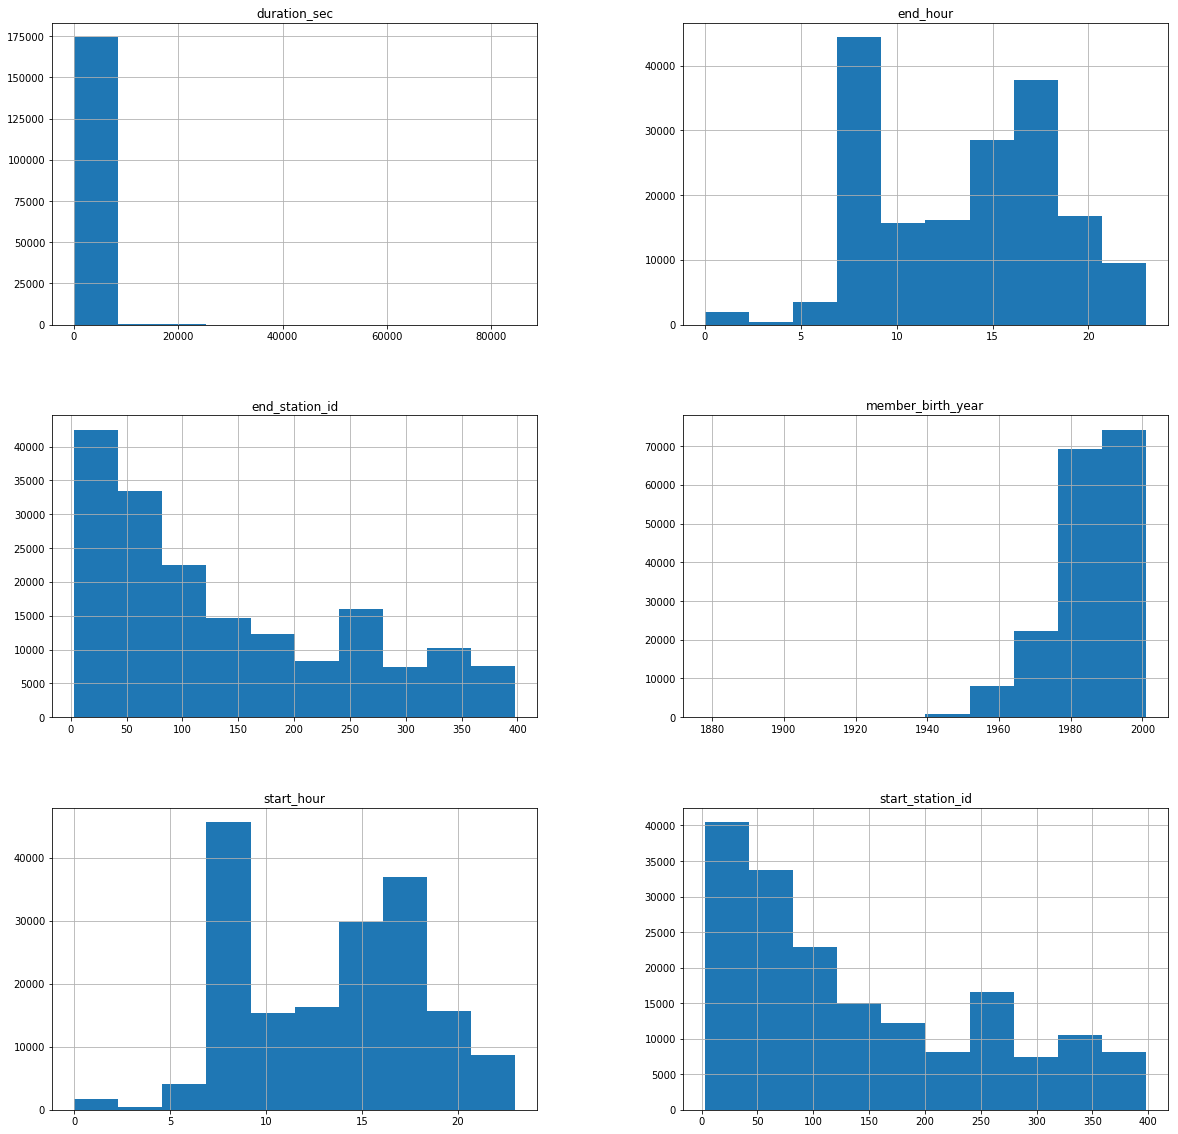

In [21]:
#histogram to visualize all numerical data in ourdata set at ones
df1.hist(figsize=(20,20));

Some of the interesting outcomes from the graphs are:
- The duration seems to be in one group. It will be necessary to view it alone and see why. And it looks like it is between 0 and 10000
- The end hour is skewed to the right, and between 7 and 8, people seem to finnsh at that time. If not, then between the range of 7 and 20. 
- The start hour is more or less similar to the end hour.

#### 2. Visualizing the duration

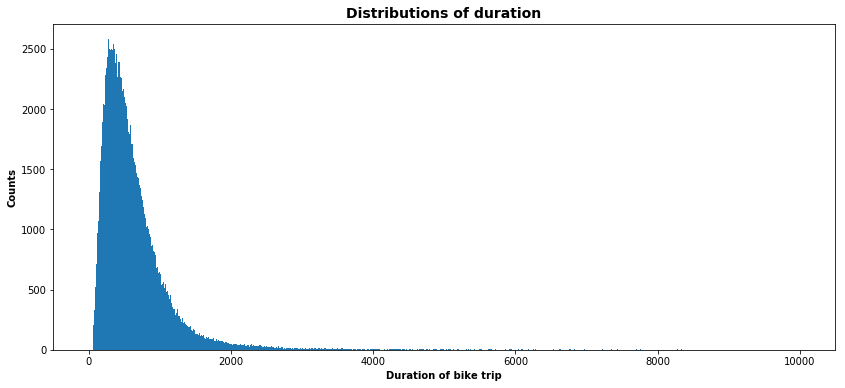

In [24]:
#duration histogram
bins = np.arange(0, 10000, 10)
plt.figure(figsize=(14, 6))
plt.hist(df1.duration_sec, bins=bins)
plt.title('Distributions of duration', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.xlabel('Duration of bike trip', fontsize=10, weight='bold');

- It knows it shows that it is skewed to the right, but more data points this time are between 0 and 1500.
- To see it clearly, we can slice it more.

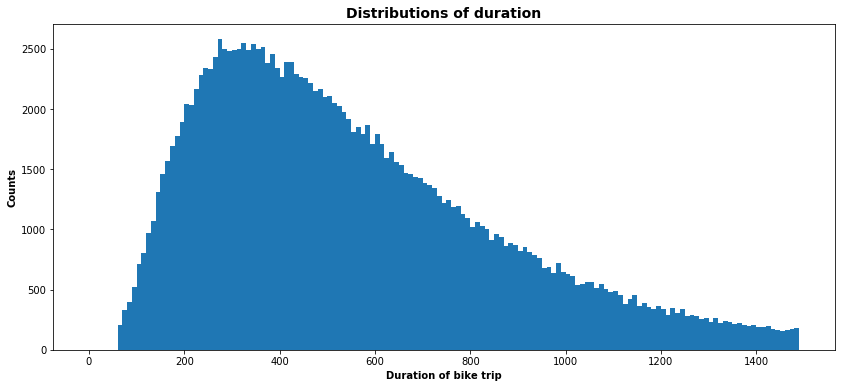

In [25]:
bins = np.arange(0, 1500, 10)
plt.figure(figsize=(14, 6))
plt.hist(df1.duration_sec, bins=bins)
plt.title('Distributions of duration', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.xlabel('Duration of bike trip', fontsize=10, weight='bold');

This makes it obvious that the pick is close to 400.

We may now attempt to plot the first 100 minutes in 10 minute intervals to examine the results.

(0, 110000)

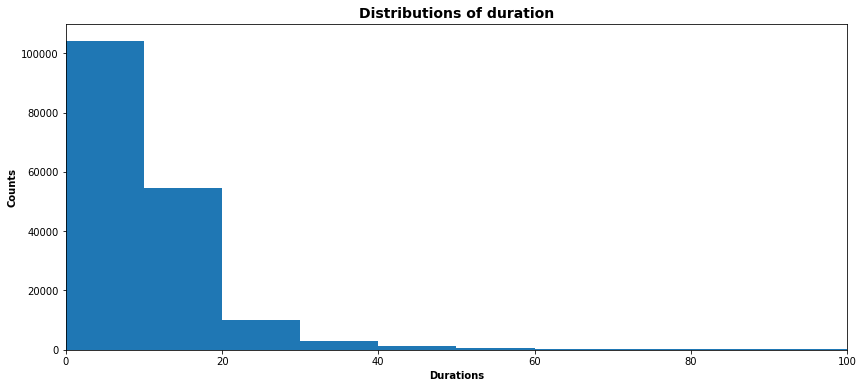

In [27]:
df1['duration_min'] =df1['duration_sec']/60
bins = np.arange(0, df1.duration_min.max(0)+1, 10)
plt.figure(figsize=(14, 6))
plt.hist(data=df1, x='duration_min', bins=bins)
plt.title('Distributions of duration', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.xlabel('Durations', fontsize=10, weight='bold')
plt.xlim((0,100))
plt.ylim((0,110000))

Considering the intervals between 0 and 100 minutes. Most rides, as can be seen, occur within the first 10 minutes.

#### 3. Percentage of users who are male and female

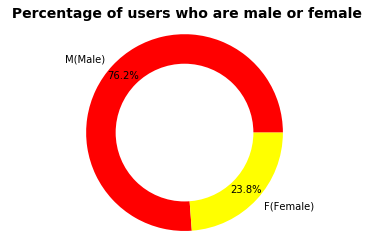

In [28]:
#Donut chart for gender
M = df1.query("member_gender == 'Male'")["member_gender"].count()
F = df1.query("member_gender == 'Female'")["member_gender"].count()
gender = [M, F]
labels = 'M(Male)', 'F(Female)'
colors = ['#FF0000', '#FFFF00']
plt.pie(gender, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('square');
plt.title(" Percentage of users who are male or female", fontsize=14, weight='bold')
plt.show()

The gender split is 76.2% men to 23.8% women.

#### 4. Number of User Types Split

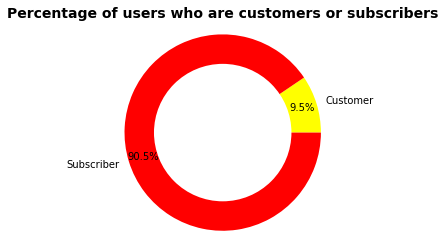

In [29]:
#Donut chart for number of user types split
customer = df1.query("user_type == 'Customer'")["user_type"].count()
subscriber = df1.query("user_type == 'Subscriber'")["user_type"].count()
labels = 'Customer', 'Subscriber'
colors = ['#FFFF00', '#FF0000']
userType = [customer, subscriber]
plt.pie(userType, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
plt.axis('square');
fig.gca().add_artist(centre_circle)
plt.title("Percentage of users who are customers or subscribers", fontsize=14, weight='bold')
plt.show()

90.5% of users fall under the subscriber category, and 9.5% fall under the customer category.

#### 4.The number of bike rides rented on the various days of the week 

In [30]:
df1

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,17,8,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,12,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,17,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,23,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,23,0,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,Subscriber,1983.0,Female,No,23,0,19.116667
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,Subscriber,1989.0,Male,No,23,0,26.916667
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,Subscriber,1988.0,Other,No,23,0,26.166667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,Subscriber,1992.0,Male,No,23,0,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,43.0,San Francisco Public Library (Grove St at Hyde...,Subscriber,1996.0,Female,Yes,23,0,7.633333


In [31]:
# Produce and start day and an end day column for the start time and end time columns
df1['start_day'] = df1['start_time'].dt.day_name()
df1['end_day'] = df1['end_time'].dt.day_name()

In [32]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,duration_min,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,17,8,869.750000,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,12,5,1030.900000,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,17,4,608.166667,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,23,0,26.416667,Thursday,Friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,23,0,29.883333,Thursday,Friday


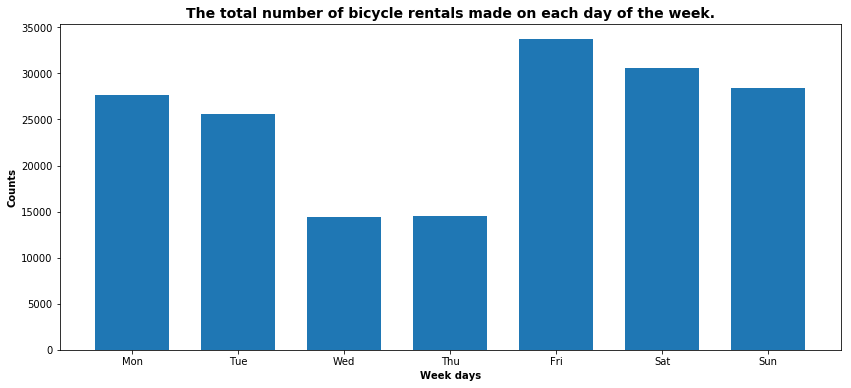

In [34]:
#Producing a bar chart for start day 
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14,6])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df1, x = 'start_day', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), days)
plt.title('The total number of bicycle rentals made on each day of the week.', fontsize=14, weight='bold')
plt.xlabel('Week days' , fontsize=10, weight='bold')
plt.ylabel('Counts' , fontsize=10, weight='bold');

- It is interesting how many bicycles are rented on Friday, and I think it is because people may go for a walk with their bike to relax after work. And also on the weeks. It is also interesting that people rent bicycles on Mondays and Tuesdays. Maybe relax for five days and work for two days, lol. People don't rent much on Wednesday and Thursday, and I presume many people are working here. 

- It will be interesting to check which are the most popular hours to rent a bike

#### 6.Periods when renting bicycles is most common

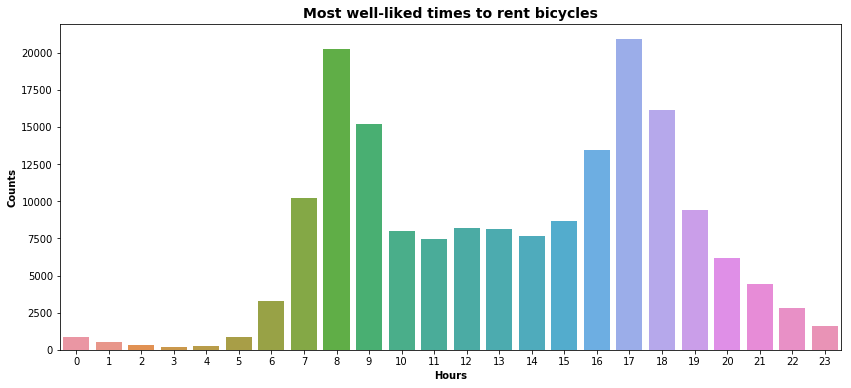

In [35]:
order = np.arange(0,24)
plt.figure(figsize=(14, 6))
plt.title('Most well-liked times to rent bicycles', fontsize=14, weight='bold')
ax = sb.countplot(data=df1, x='start_hour', order=order)
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.xlabel('Hours', fontsize=10, weight='bold');

From 7 am to 7 pm is when most people want to rent bikes. Because humans are active from dawn until evening and sleep at night, I believe this to be the case.

#### 7. The time the bike was delivered back

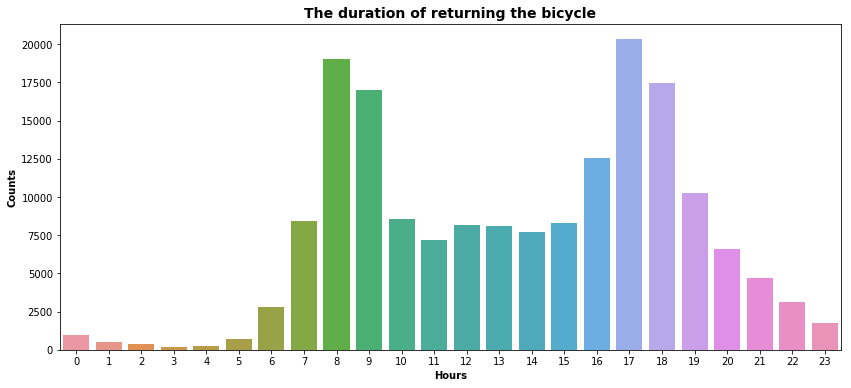

In [37]:
hour_order = np.arange(0,24)
plt.figure(figsize=(14, 6))
plt.title('The duration of returning the bicycle', fontsize=14, weight='bold')
ax = sb.countplot(data=df1, x='end_hour', order=hour_order)
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.xlabel('Hours', fontsize=10, weight='bold');

It appears that the return window, which was from 7 am to 7 pm, was almost the same as the ranting window.

#### 8. The Leading ten starting stations

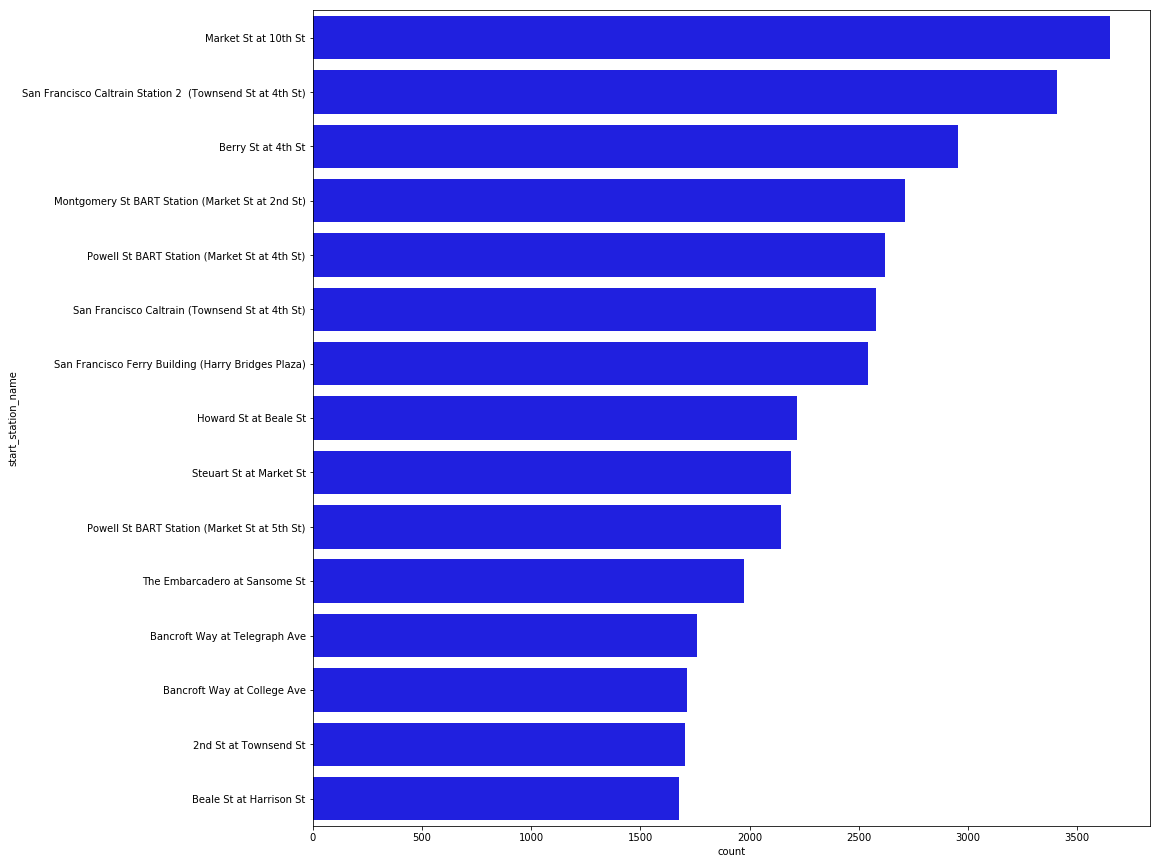

In [38]:
station = df1['start_station_name'].value_counts().index[:15]
plt.figure(figsize=[15,15])
sb.countplot(data = df1, y = 'start_station_name', order = station, color = "blue");

The best three starting situations are Market st, San Francisco Caltrain, and Berry st, respectively. 

#### 9. The Leading ten ending stations

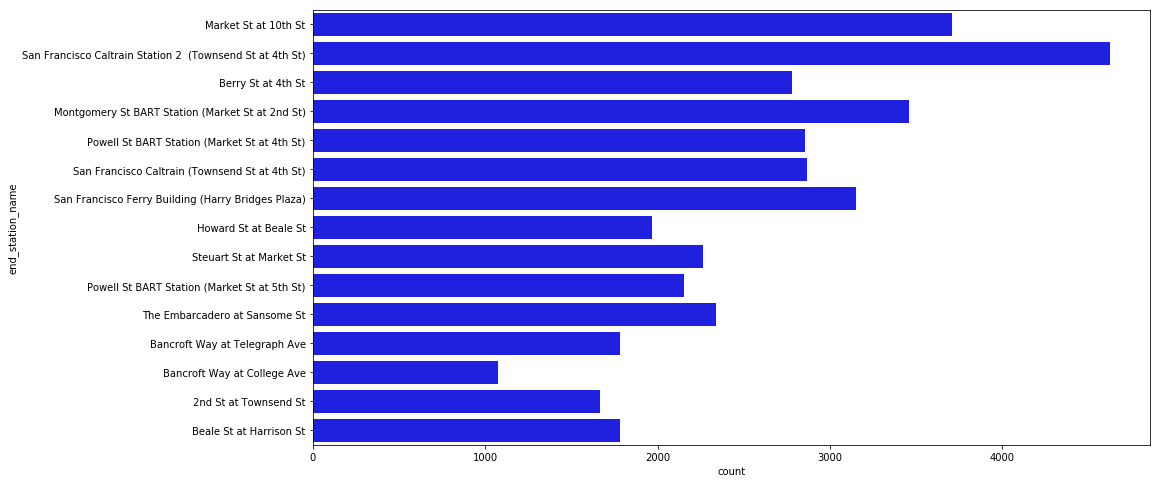

In [39]:
end = df1['end_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,8])
sb.countplot(data = df1, y = 'end_station_name', order = station, color = "blue");

Again the best three ending situations are Market st, San Francisco Caltrain, and Berry st, respectively. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No changes were made, although, for many charts, the duration of seconds was changed to the period of minutes because it is simpler to read than to calculate how long. Around 7 am and 7 pm are when most bicycling ends and starts. Men primarily use bikes, and 90.5% of users are subscribers. In addition to Monday and Tuesday, Friday, Saturday, and Sunday are the busiest days.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, I did perform operations like changing datatypes for some features and creating new columns.

## Bivariate Exploration

#### 10. What connection exists between user types and gender?

*One issue to solve for use to perform a better analysis on gender is removing other genders, not male and female.*

In [40]:
#remove other gender
#gender = df1.groupby(['member_gender'])['member_gender'].count()
df2 = df1.loc[df1["member_gender"] != 'Other']

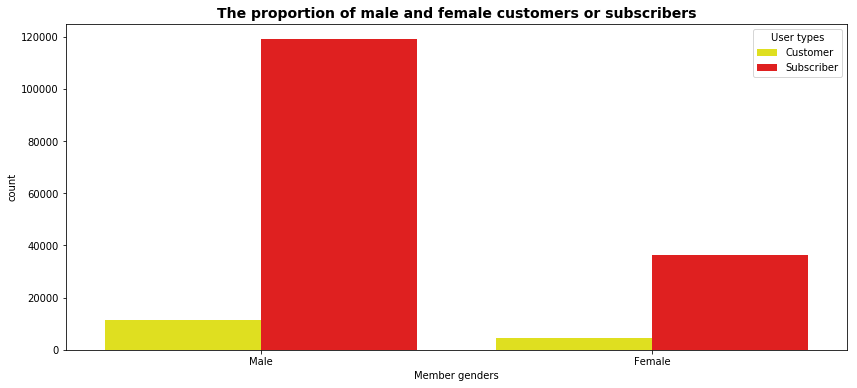

In [42]:
plt.figure(figsize=(14,6))
ax = sb.countplot(x=df2.member_gender, hue=df2.user_type, palette=['#FFFF00', '#FF0000'])
ax.set_title("The proportion of male and female customers or subscribers" , fontsize=14, weight='bold')
x_ticks_labels=['Male', 'Female']
ax.set_xticklabels(x_ticks_labels)
ax.set_xlabel('Member genders')
plt.legend(title='User types', loc='upper right', labels=['Customer', 'Subscriber'])
plt.show()

Although there are far more subscribers than customers, there are significantly more male subscribers than female subscribers. In terms of clients, males outnumber females.

#### 11. What is the relationship between gender and user types?

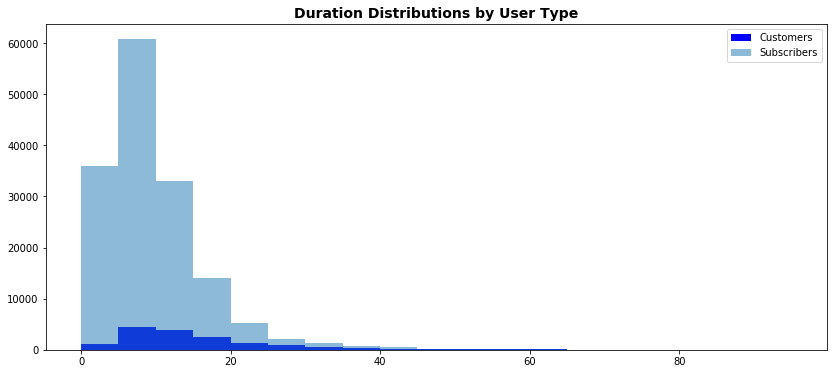

In [44]:
#showing customers and subscribers duration distributions in one graph

customer = df2['user_type']=='Customer'
subscriber = df2['user_type']=='Subscriber'
plt.figure(figsize=(14, 6))
bins = np.arange(0, 100, 5)
plt.hist(df2[customer].duration_min, bins, alpha=1, label='Customers', color = 'blue')
plt.hist(df2[subscriber].duration_min, bins, alpha=0.5, label='Subscribers')
plt.legend(loc='upper right')
plt.title('Duration Distributions by User Type', fontsize=14, weight='bold')
plt.show()

The histogram that shows the duration of subscribers' and customers' users' sessions. Perhaps due to the higher rates per minute, customers make up a considerably smaller portion of the duration distribution. The bulk of subscribers, however, used the bike for 0 to 20 minutes.

#### 12. What connection exists between different user categories and the workweek?

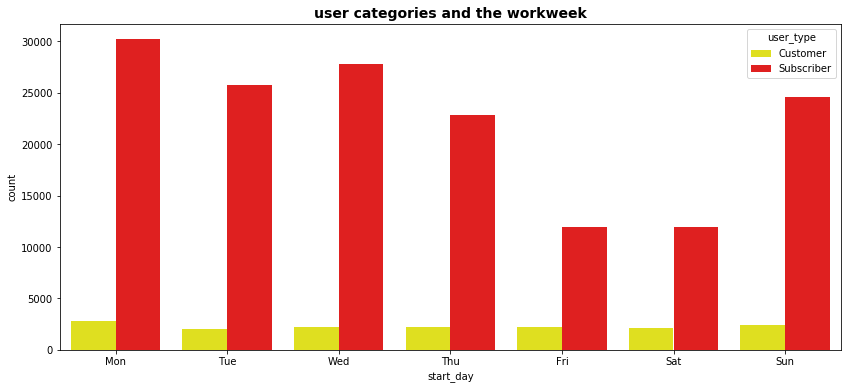

In [45]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = [14,6])
sb.countplot(data = df2, x = 'start_day', hue = 'user_type', palette=['#FFFF00', '#FF0000'])
ax.legend(ncol = 2)
plt.title('user categories and the workweek' , fontsize=14, weight='bold')
plt.xticks(np.arange(0, 6+1, 1), days)
plt.show()

Assessing the days of the week that bike service users and subscribers use the service the most. Interestingly, subscribers are most active on Monday, Tuesday, and Wednesday, whereas customers are most active on Monday and Sunday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It is challenging to compare subscribers and customers side by side without considering proportions because there is a significant variation between them. For example, men are more prevalent in both user types than females.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When I include the additional variable of user types, the univariate plot of the count of bike rides during the week looks different. 

## Multivariate Exploration

#### 13. Average journey length for many people, both male and female

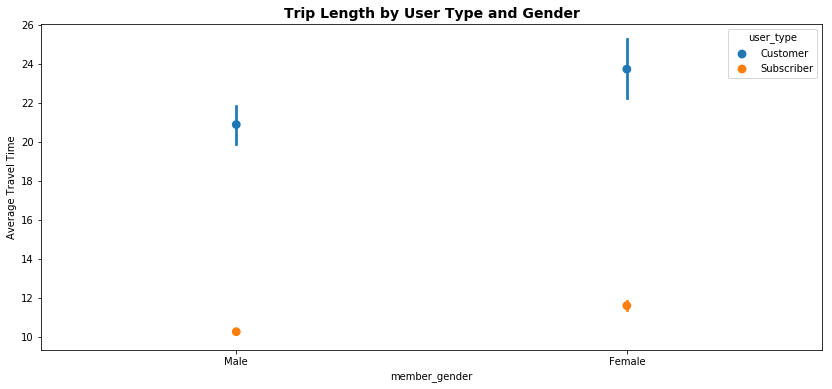

In [47]:
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = df2, x ='member_gender', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.title('Trip Length by User Type and Gender', fontsize=14, weight='bold')
plt.ylabel('Average Travel Time')
plt.show();

More women than men often use the bikes over time. Additionally, they have a wider range of averages.

#### 13. Average journey length for various users on different days of the week

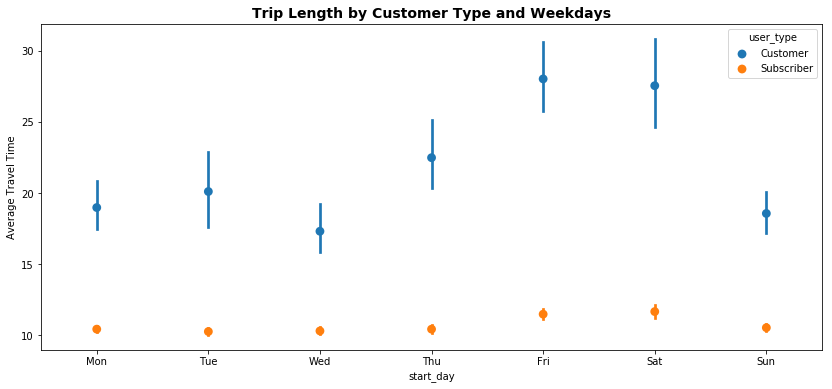

In [48]:
fig = plt.figure(figsize = [14,6])
ax = sb.pointplot(data = df2, x ='start_day', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.title('Trip Length by Customer Type and Weekdays', fontsize=14, weight='bold')
plt.ylabel('Average Travel Time')
plt.xticks(np.arange(0, 6+1, 1), days)
ax.set_yticklabels([],minor = True)
plt.show();

For both user types, Friday and Saturday are the busiest days. Sunday has the third-highest number of subscribers, while Thursday has the third-highest number of customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers' average ride times are longer than subscribers', and females ride for longer on average.

### Were there any interesting or surprising interactions between features?

Yeah! The average ride time for customers appears to be longer than for subscribers.

## Conclusions
- Each of these graphs supports the basic idea that while subscribers frequently use them to commute to work or school, clients are more likely to be travelers, tourists, or occasional users.
- The usual hours were skewed to 7 am and 7 pm because subscribers have a significantly bigger user base. It would be fascinating to observe the difference if a study were done on the number of hours users have utilized them.
- Customers' bike trips typically last longer than Subscribers' do.
- About 90.5% of the trips were taken by subscribers.
- Men make up about three-quarters of the users.
